In [17]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
!ls -lh *csv

-rw-rw-r-- 1 oem oem  835 Jun 23 00:30 coords_to_use.csv
-rw-rw-r-- 1 oem oem 5.7K Jun 29 15:41 fc_sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem  37K Jun 29 15:49 fcsgp_radprof_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 6.1K Jun 29 15:42 rl_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 4.9K Jun 29 15:42 sgp_params_and_metrics.csv
-rw-rw-r-- 1 oem oem 249K Jun  3 17:25 standard_stars.csv


In [21]:
df = pd.read_csv('fcsgp_radprof_params_and_metrics.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.columns = ["image", "original_radprof", "orig_fitted_data", "radprof", "fitted_data", "jsd_before", "jsd_after", "param_errs"]
df

,image,original_radprof,orig_fitted_data,radprof,fitted_data,jsd_before,jsd_after,param_errs
0,FC_SGP_original_images/ccfbue110099.fits_327.3...,"[8578.466082026747, 22614.035019828923, 29107....","[14022.554708277055, 20448.569564492616, 25549...","[27418.21165063492, 60074.13800084366, 52664.9...","[28164.61658424976, 58928.69049673496, 54075.7...",0.034605,0.000722,[5.97814599e+02 1.21650791e-02 1.30683723e-02]
1,FC_SGP_original_images/ccfbvc170118.fits_178.2...,"[600.5205729735425, 1720.74417425522, 2400.558...","[860.1498044753873, 1525.9120085206011, 2221.3...","[2426.6961297605058, 5551.266540533096, 6118.1...","[2882.9937895012117, 5046.454453599706, 6158.6...",0.002060,0.002259,[1.40972441e+02 4.55631161e-02 5.02885937e-02]
2,FC_SGP_original_images/ccfbvc170118.fits_474.0...,"[490.7524775950241, 1445.8691057896358, 2275.2...","[1014.3753080089041, 1492.349587645076, 2001.6...","[1883.4566705634368, 4026.917381839922, 4469.5...","[2255.220375050476, 3623.792326779502, 4402.98...",0.006527,0.001140,[1.12250802e+02 5.88833247e-02 6.57547272e-02]
3,FC_SGP_original_images/ccfbvc170118.fits_485.6...,"[4385.0328297380765, 12168.95578588477, 17884....","[11141.744259316783, 13207.373553454743, 15105...","[18944.80169755332, 43836.93734915709, 44559.4...","[22389.21539958833, 39627.65487763434, 45718.2...",0.010618,0.005606,[1.22454698e+03 4.86668233e-02 5.38022736e-02]
4,FC_SGP_original_images/ccfbvc170119.fits_226.8...,"[331.4445330268588, 978.5155630775607, 1438.07...","[746.4241858126996, 1009.712434852673, 1269.88...","[865.576635678106, 2333.5558872646393, 2778.86...","[1178.8860141479452, 2063.012396850882, 2676.6...",0.010749,0.002473,[8.57121781e+01 6.82441242e-02 7.48846011e-02]
5,FC_SGP_original_images/ccfbvc170119.fits_297.1...,"[780.34343949443, 2158.2110207410315, 3049.160...","[1811.6575635377728, 2245.081562925598, 2655.5...","[2523.878683925842, 5455.566320384629, 6151.18...","[2961.9598891732667, 4959.965556014973, 6158.3...",0.006991,0.003388,[1.28339496e+02 4.56842419e-02 5.06653907e-02]
6,FC_SGP_original_images/ccfbvc170119.fits_515.4...,"[1894.9563943036737, 5481.503321311827, 8243.5...","[4802.653612056561, 6026.701926565279, 7253.60...","[5973.204708901139, 15269.209055518091, 18472....","[7613.2397935703275, 13789.18938555619, 18166....",0.004850,0.005064,[4.42557517e+02 4.99389768e-02 5.44435827e-02]
7,FC_SGP_original_images/ccfbvc170120.fits_266.2...,"[6633.221719443054, 19499.1533390958, 31107.39...","[18306.828648292, 23497.40964038677, 28730.302...","[19200.62874657624, 48409.426005081725, 60394....","[23612.124945354324, 44254.51034473367, 59892....",0.012562,0.005477,[1.21097469e+03 4.03694089e-02 4.36672558e-02]
8,FC_SGP_original_images/ccfbvc170120.fits_484.9...,"[542.9339703527462, 1696.0766670484581, 2790.1...","[1193.2857246992908, 1861.3878367147506, 2653....","[1775.0057810851981, 4575.778458415523, 6061.0...","[2575.7707881398514, 4169.344300014042, 5581.2...",0.003225,0.002370,[1.83119159e+02 8.14694611e-02 8.96369524e-02]
9,FC_SGP_original_images/ccfbvc170121.fits_178.0...,"[1071.4400389914294, 2979.3914747018134, 4531....","[2307.097855643933, 3200.986226492218, 4150.29...","[2727.216813367049, 6522.549628515317, 8247.70...","[3442.767117471059, 5962.75145284602, 8011.750...",0.006553,0.001794,[1.72649612e+02 4.79877507e-02 5.24621147e-02]


In [32]:
df.iloc[5], df.iloc[3], df.iloc[4]

(image               FC_SGP_original_images/ccfbvc170119.fits_297.1...
 original_radprof    [780.34343949443, 2158.2110207410315, 3049.160...
 orig_fitted_data    [1811.6575635377728, 2245.081562925598, 2655.5...
 radprof             [2523.878683925842, 5455.566320384629, 6151.18...
 fitted_data         [2961.9598891732667, 4959.965556014973, 6158.3...
 jsd_before                                                   0.006991
 jsd_after                                                    0.003388
 param_errs             [1.28339496e+02 4.56842419e-02 5.06653907e-02]
 Name: 5, dtype: object,
 image               FC_SGP_original_images/ccfbvc170118.fits_485.6...
 original_radprof    [4385.0328297380765, 12168.95578588477, 17884....
 orig_fitted_data    [11141.744259316783, 13207.373553454743, 15105...
 radprof             [18944.80169755332, 43836.93734915709, 44559.4...
 fitted_data         [22389.21539958833, 39627.65487763434, 45718.2...
 jsd_before                                         

In [31]:
df.iloc[5]['image'], df.iloc[3]['image'], df.iloc[4]['image']

('FC_SGP_original_images/ccfbvc170119.fits_297.1877_311.5624_SGP_orig.fits',
 'FC_SGP_original_images/ccfbvc170118.fits_485.6476_528.831_SGP_orig.fits',
 'FC_SGP_original_images/ccfbvc170119.fits_226.8246_174.0645_SGP_orig.fits')

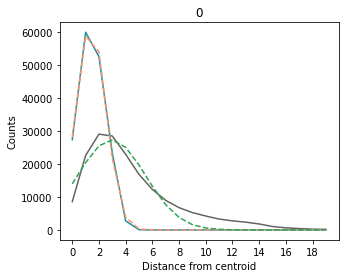

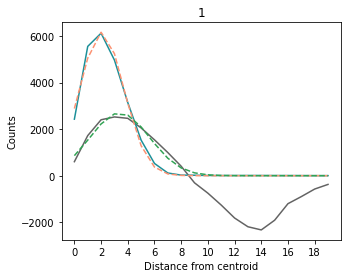

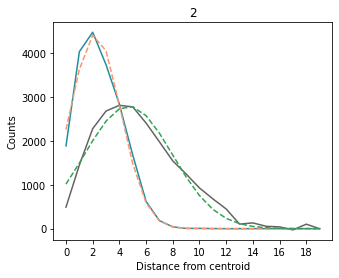

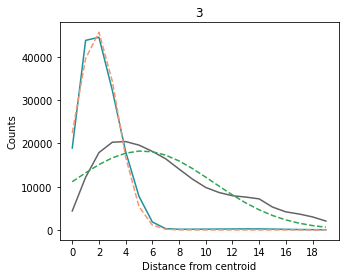

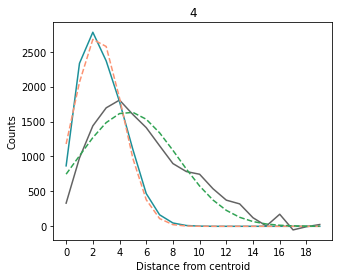

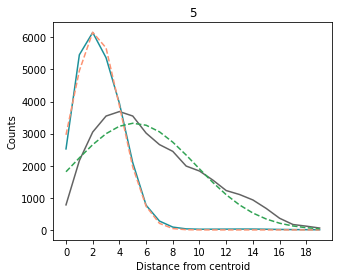

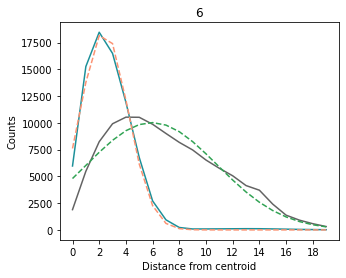

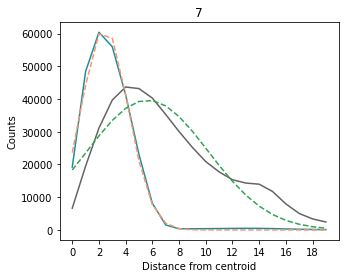

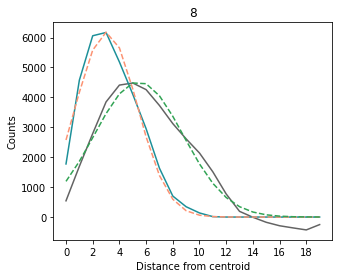

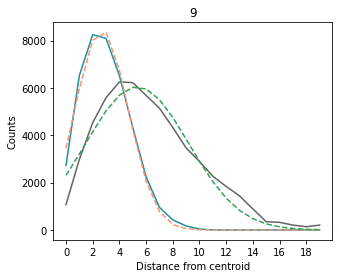

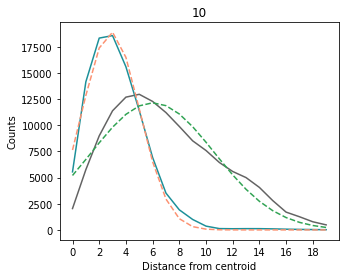

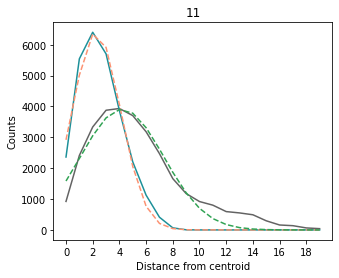

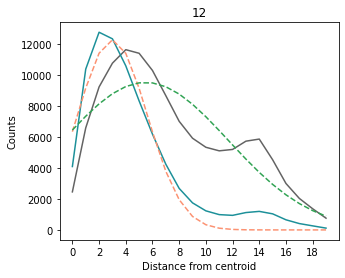

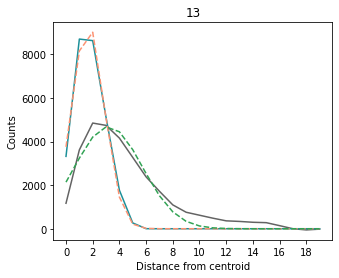

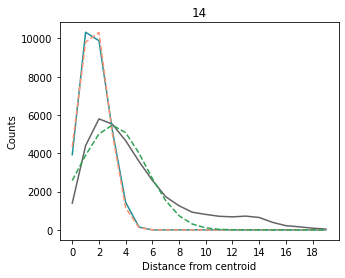

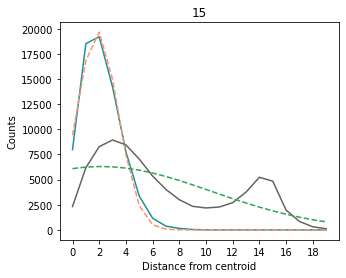

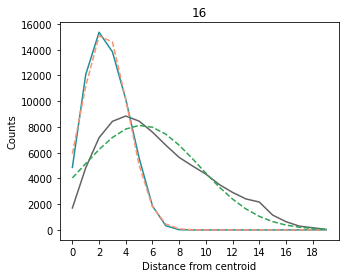

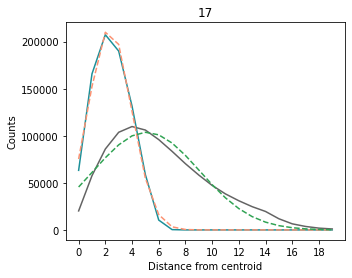

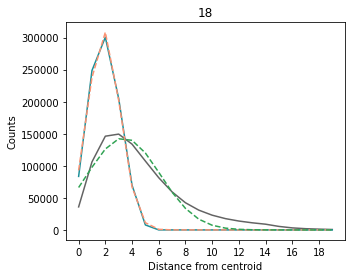

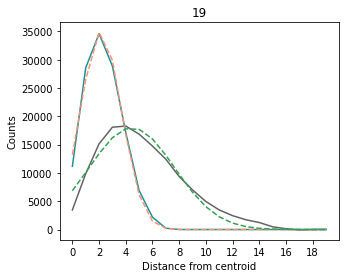

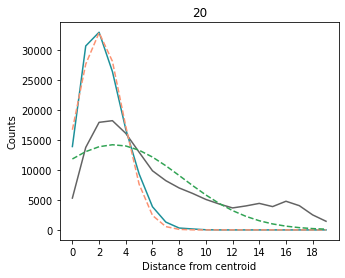

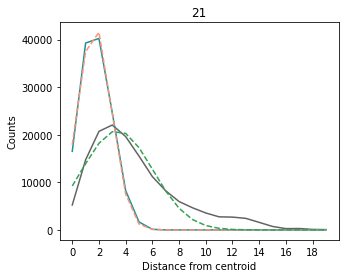

In [24]:
for i in range(df.shape[0]):
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    ax.plot(ast.literal_eval(df.iloc[i]["original_radprof"]), c='#636363', label='original');
    ax.plot(ast.literal_eval(df.iloc[i]["radprof"]), c='#1C9099', label='reconstructed');
    ax.plot(ast.literal_eval(df.iloc[i]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
    ax.plot(ast.literal_eval(df.iloc[i]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
    ax.set_xticks(ticks=np.arange(0, 20, 2));
    ax.set_ylabel("Counts");
    ax.set_xlabel("Distance from centroid");
    ax.set_title(f'{i}')
    plt.show()

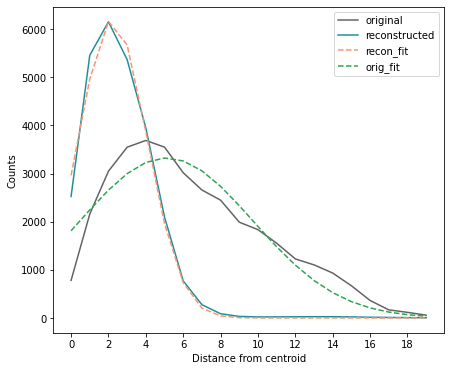

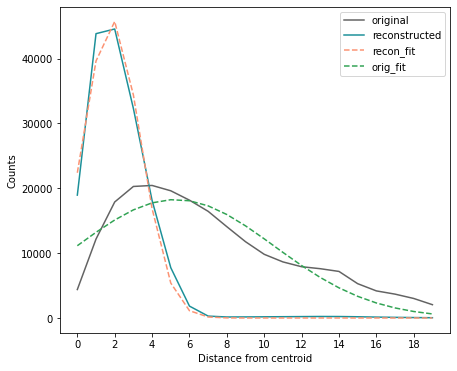

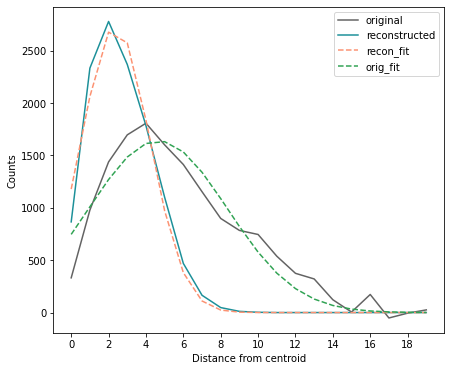

In [30]:
# df.iloc[0], df.iloc[1], df.iloc[27]

# colors = ["#7aa0c4", "#ca82e1", "#8bcd50"]

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[5]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[5]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[5]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[5]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");

plt.legend();
plt.savefig("radprof_5.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[3]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[3]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[3]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[3]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_3.png", bbox_inches='tight', dpi=500)

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.plot(ast.literal_eval(df.iloc[4]["original_radprof"]), c='#636363', label='original');
ax.plot(ast.literal_eval(df.iloc[4]["radprof"]), c='#1C9099', label='reconstructed');
ax.plot(ast.literal_eval(df.iloc[4]["fitted_data"]), c='#FC9272', linestyle='--', label='recon_fit');
ax.plot(ast.literal_eval(df.iloc[4]["orig_fitted_data"]), c='#31a354', linestyle='--', label='orig_fit');
ax.set_xticks(ticks=np.arange(0, 20, 2));
ax.set_ylabel("Counts");
ax.set_xlabel("Distance from centroid");
plt.legend();
plt.savefig("radprof_4.png", bbox_inches='tight', dpi=500)

In [26]:
sum(df["jsd_before"] > df["jsd_after"])

19

In [9]:
df.iloc[1]["image"], df.iloc[3]["image"], df.iloc[27]["image"]

IndexError: single positional indexer is out-of-bounds

In [18]:
!ls -lh radprof*png

-rw-rw-r-- 1 oem oem 227K Jun 23 11:44 radprof_12.png
-rw-rw-r-- 1 oem oem 298K Jun 28 12:08 radprof_4.png
-rw-rw-r-- 1 oem oem 295K Jun 28 12:08 radprof_5.png
-rw-rw-r-- 1 oem oem 310K Jun 28 12:08 radprof_9.png
